In [327]:
import pandas as pd
import requests
import json

## Extracción de los datos

In [328]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

In [329]:
data = requests.get(url)

In [330]:
df_data = json.loads(data.text)

In [331]:
datos = pd.json_normalize(df_data)

In [332]:
datos.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [333]:
datos.shape

(7267, 21)

## Eliminar columna ID

In [334]:
datos = datos.drop(columns="customerID")

In [335]:
datos.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [336]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7267 non-null   object 
 1   customer.gender            7267 non-null   object 
 2   customer.SeniorCitizen     7267 non-null   int64  
 3   customer.Partner           7267 non-null   object 
 4   customer.Dependents        7267 non-null   object 
 5   customer.tenure            7267 non-null   int64  
 6   phone.PhoneService         7267 non-null   object 
 7   phone.MultipleLines        7267 non-null   object 
 8   internet.InternetService   7267 non-null   object 
 9   internet.OnlineSecurity    7267 non-null   object 
 10  internet.OnlineBackup      7267 non-null   object 
 11  internet.DeviceProtection  7267 non-null   object 
 12  internet.TechSupport       7267 non-null   object 
 13  internet.StreamingTV       7267 non-null   objec

In [337]:
# datos unicos para cada columna
for columna in datos.columns:
    print(f"===== Columna: '{columna}' =====")
    val_unicos = datos[columna].unique()
    print(sorted(val_unicos))
    print("--------------------------------------")
    print("\n")

===== Columna: 'Churn' =====
['', 'No', 'Yes']
--------------------------------------


===== Columna: 'customer.gender' =====
['Female', 'Male']
--------------------------------------


===== Columna: 'customer.SeniorCitizen' =====
[np.int64(0), np.int64(1)]
--------------------------------------


===== Columna: 'customer.Partner' =====
['No', 'Yes']
--------------------------------------


===== Columna: 'customer.Dependents' =====
['No', 'Yes']
--------------------------------------


===== Columna: 'customer.tenure' =====
[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), 

In [338]:
# Convertir columna account.Changes.Total en numero. Los valores " " se convertirar en NaN
datos['account.Charges.Total'] = pd.to_numeric(datos['account.Charges.Total'], errors='coerce')

In [339]:
# Los valores NaN se traspasaran a Cero
datos['account.Charges.Total'].fillna(0, inplace=True)

/tmp/ipython-input-3577535733.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos['account.Charges.Total'].fillna(0, inplace=True)


In [340]:
datos['customer.SeniorCitizen'] = datos['customer.SeniorCitizen'].astype(str)

In [341]:
# Eliminar los Chunk "" dado que no se tiene informacion sobre ellos
sin_chunk = datos[datos['Churn']==""].copy()

In [342]:
datos = datos[datos['Churn']!=""].copy()

In [343]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7043 non-null   object 
 1   customer.gender            7043 non-null   object 
 2   customer.SeniorCitizen     7043 non-null   object 
 3   customer.Partner           7043 non-null   object 
 4   customer.Dependents        7043 non-null   object 
 5   customer.tenure            7043 non-null   int64  
 6   phone.PhoneService         7043 non-null   object 
 7   phone.MultipleLines        7043 non-null   object 
 8   internet.InternetService   7043 non-null   object 
 9   internet.OnlineSecurity    7043 non-null   object 
 10  internet.OnlineBackup      7043 non-null   object 
 11  internet.DeviceProtection  7043 non-null   object 
 12  internet.TechSupport       7043 non-null   object 
 13  internet.StreamingTV       7043 non-null   object 
 1

In [344]:
# Renombras columnas
nombres_nuevos = {
    'Churn': 'churn',
    'customer.gender': 'genero',
    'customer.SeniorCitizen': 'adulto_mayor',
    'customer.Partner': 'tiene_pareja',
    'customer.Dependents': 'tiene_dependientes',
    'customer.tenure': 'antiguedad_meses',
    'phone.PhoneService': 'servicio_telefonico',
    'phone.MultipleLines': 'multiples_lineas',
    'internet.InternetService': 'servicio_internet',
    'internet.OnlineSecurity': 'seguridad_online',
    'internet.OnlineBackup': 'respaldo_online',
    'internet.DeviceProtection': 'proteccion_dispositivo',
    'internet.TechSupport': 'soporte_tecnico',
    'internet.StreamingTV': 'streaming_tv',
    'internet.StreamingMovies': 'streaming_peliculas',
    'account.Contract': 'tipo_contrato',
    'account.PaperlessBilling': 'facturacion_electronica',
    'account.PaymentMethod': 'metodo_pago',
    'account.Charges.Monthly': 'factura_mensual',
    'account.Charges.Total': 'factura_total'
}

In [345]:
datos.rename(columns=nombres_nuevos, inplace=True)

In [346]:
# Simplificando los datos
datos.replace(['No internet service', 'No phone service'], 'No', inplace=True)

In [347]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   churn                    7043 non-null   object 
 1   genero                   7043 non-null   object 
 2   adulto_mayor             7043 non-null   object 
 3   tiene_pareja             7043 non-null   object 
 4   tiene_dependientes       7043 non-null   object 
 5   antiguedad_meses         7043 non-null   int64  
 6   servicio_telefonico      7043 non-null   object 
 7   multiples_lineas         7043 non-null   object 
 8   servicio_internet        7043 non-null   object 
 9   seguridad_online         7043 non-null   object 
 10  respaldo_online          7043 non-null   object 
 11  proteccion_dispositivo   7043 non-null   object 
 12  soporte_tecnico          7043 non-null   object 
 13  streaming_tv             7043 non-null   object 
 14  streaming_peliculas      7043

In [348]:
datos.columns.tolist()

['churn',
 'genero',
 'adulto_mayor',
 'tiene_pareja',
 'tiene_dependientes',
 'antiguedad_meses',
 'servicio_telefonico',
 'multiples_lineas',
 'servicio_internet',
 'seguridad_online',
 'respaldo_online',
 'proteccion_dispositivo',
 'soporte_tecnico',
 'streaming_tv',
 'streaming_peliculas',
 'tipo_contrato',
 'facturacion_electronica',
 'metodo_pago',
 'factura_mensual',
 'factura_total']

In [349]:
datos[datos.select_dtypes(include=['number']).columns].mean()

,0
antiguedad_meses,32.371149
factura_mensual,64.761692
factura_total,2279.734304


In [350]:
datos[datos.select_dtypes(include=['object']).columns].groupby(datos["churn"]).describe().T

churn                                     No               Yes
churn                   count           5174              1869
                        unique             1                 1
                        top               No               Yes
                        freq            5174              1869
genero                  count           5174              1869
...                                      ...               ...
facturacion_electronica freq            2771              1400
metodo_pago             count           5174              1869
                        unique             4                 4
                        top     Mailed check  Electronic check
                        freq            1304              1071

[68 rows x 2 columns]

In [351]:
datos[datos.select_dtypes(include=['number']).columns].groupby(datos["churn"]).describe().T

churn                            No          Yes
antiguedad_meses count  5174.000000  1869.000000
                 mean     37.569965    17.979133
                 std      24.113777    19.531123
                 min       0.000000     1.000000
                 25%      15.000000     2.000000
                 50%      38.000000    10.000000
                 75%      61.000000    29.000000
                 max      72.000000    72.000000
factura_mensual  count  5174.000000  1869.000000
                 mean     61.265124    74.441332
                 std      31.092648    24.666053
                 min      18.250000    18.850000
                 25%      25.100000    56.150000
                 50%      64.425000    79.650000
                 75%      88.400000    94.200000
                 max     118.750000   118.350000
factura_total    count  5174.000000  1869.000000
                 mean   2549.911442  1531.796094
                 std    2329.954215  1890.822994
                 min       0.000000    18.850000
                 25%     572.900000   134.500000
                 50%    1679.525000   703.550000
                 75%    4262.850000  2331.300000
                 max    8672.450000  8684.800000

## Conversion variables categoticas

In [352]:
# Identificar las columnas categóricas
columnas_categoricas = datos.select_dtypes(include=['object']).columns.tolist()
columnas_categoricas


['churn',
 'genero',
 'adulto_mayor',
 'tiene_pareja',
 'tiene_dependientes',
 'servicio_telefonico',
 'multiples_lineas',
 'servicio_internet',
 'seguridad_online',
 'respaldo_online',
 'proteccion_dispositivo',
 'soporte_tecnico',
 'streaming_tv',
 'streaming_peliculas',
 'tipo_contrato',
 'facturacion_electronica',
 'metodo_pago']

In [353]:
datos_encoded = pd.get_dummies(datos, columns=columnas_categoricas, drop_first=True)
datos_encoded.head()

,antiguedad_meses,factura_mensual,factura_total,churn_Yes,genero_Male,adulto_mayor_1,tiene_pareja_Yes,tiene_dependientes_Yes,servicio_telefonico_Yes,multiples_lineas_Yes,...,proteccion_dispositivo_Yes,soporte_tecnico_Yes,streaming_tv_Yes,streaming_peliculas_Yes,tipo_contrato_One year,tipo_contrato_Two year,facturacion_electronica_Yes,metodo_pago_Credit card (automatic),metodo_pago_Electronic check,metodo_pago_Mailed check
0,9,65.6,593.30,False,False,False,True,True,True,False,...,False,True,True,False,True,False,True,False,False,True
1,9,59.9,542.40,False,True,False,False,False,True,True,...,False,False,False,True,False,False,False,False,False,True
2,4,73.9,280.85,True,True,False,False,False,True,False,...,True,False,False,False,False,False,True,False,True,False
3,13,98.0,1237.85,True,True,True,True,False,True,False,...,True,False,True,True,False,False,True,False,True,False
4,3,83.9,267.40,True,False,True,True,False,True,False,...,False,True,True,False,False,False,True,False,False,True


In [354]:
columnas_encoded = datos_encoded.columns.tolist()
columnas_encoded

['antiguedad_meses',
 'factura_mensual',
 'factura_total',
 'churn_Yes',
 'genero_Male',
 'adulto_mayor_1',
 'tiene_pareja_Yes',
 'tiene_dependientes_Yes',
 'servicio_telefonico_Yes',
 'multiples_lineas_Yes',
 'servicio_internet_Fiber optic',
 'servicio_internet_No',
 'seguridad_online_Yes',
 'respaldo_online_Yes',
 'proteccion_dispositivo_Yes',
 'soporte_tecnico_Yes',
 'streaming_tv_Yes',
 'streaming_peliculas_Yes',
 'tipo_contrato_One year',
 'tipo_contrato_Two year',
 'facturacion_electronica_Yes',
 'metodo_pago_Credit card (automatic)',
 'metodo_pago_Electronic check',
 'metodo_pago_Mailed check']

## Seleccion de variables con RFECV

In [355]:
colum_numerica_encoded = datos_encoded.select_dtypes(include=['number']).columns.tolist()
colum_numerica_encoded

['antiguedad_meses', 'factura_mensual', 'factura_total']

In [356]:
from sklearn.preprocessing import StandardScaler

In [357]:
scaler = StandardScaler()

In [358]:
datos_encoded[colum_numerica_encoded] = scaler.fit_transform(datos_encoded[colum_numerica_encoded])

In [359]:
datos_encoded.head()

,antiguedad_meses,factura_mensual,factura_total,churn_Yes,genero_Male,adulto_mayor_1,tiene_pareja_Yes,tiene_dependientes_Yes,servicio_telefonico_Yes,multiples_lineas_Yes,...,proteccion_dispositivo_Yes,soporte_tecnico_Yes,streaming_tv_Yes,streaming_peliculas_Yes,tipo_contrato_One year,tipo_contrato_Two year,facturacion_electronica_Yes,metodo_pago_Credit card (automatic),metodo_pago_Electronic check,metodo_pago_Mailed check
0,-0.951682,0.027862,-0.744026,False,False,False,True,True,True,False,...,False,True,True,False,True,False,True,False,False,True
1,-0.951682,-0.161583,-0.766482,False,True,False,False,False,True,True,...,False,False,False,True,False,False,False,False,False,True
2,-1.155283,0.303720,-0.881874,True,True,False,False,False,True,False,...,True,False,False,False,False,False,True,False,True,False
3,-0.788800,1.104706,-0.459662,True,True,True,True,False,True,False,...,True,False,True,True,False,False,True,False,True,False
4,-1.196004,0.636080,-0.887808,True,False,True,True,False,True,False,...,False,True,True,False,False,False,True,False,False,True


In [360]:
X_encoded = datos_encoded.drop('churn_Yes', axis=1)
y_encoded = datos_encoded['churn_Yes']

In [361]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

In [362]:
estimator = LogisticRegression(solver='liblinear', random_state=42)

In [363]:
cv = StratifiedKFold(5)

In [364]:
rfecv = RFECV(estimator=estimator, step=1, cv=cv, scoring='roc_auc', n_jobs=-1)

In [365]:
rfecv.fit(X_encoded, y_encoded)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=LogisticRegression(random_state=42, solver='liblinear'),
      n_jobs=-1, scoring='roc_auc')

In [366]:
print(f"Número óptimo de características: {rfecv.n_features_}")

Número óptimo de características: 17


In [367]:
selected_features = X_encoded.columns[rfecv.support_]
print("\nCaracterísticas seleccionadas:")
print(selected_features)


Características seleccionadas:
Index(['antiguedad_meses', 'factura_total', 'adulto_mayor_1',
       'tiene_dependientes_Yes', 'servicio_telefonico_Yes',
       'multiples_lineas_Yes', 'servicio_internet_Fiber optic',
       'servicio_internet_No', 'seguridad_online_Yes', 'respaldo_online_Yes',
       'soporte_tecnico_Yes', 'streaming_tv_Yes', 'streaming_peliculas_Yes',
       'tipo_contrato_One year', 'tipo_contrato_Two year',
       'facturacion_electronica_Yes', 'metodo_pago_Electronic check'],
      dtype='object')


In [368]:
print("----Columnas descartadas-----")
for colum in X_encoded.columns.tolist():
    if colum not in selected_features:
        print(colum)


----Columnas descartadas-----
factura_mensual
genero_Male
tiene_pareja_Yes
proteccion_dispositivo_Yes
metodo_pago_Credit card (automatic)
metodo_pago_Mailed check


In [369]:
import matplotlib.pyplot as plt

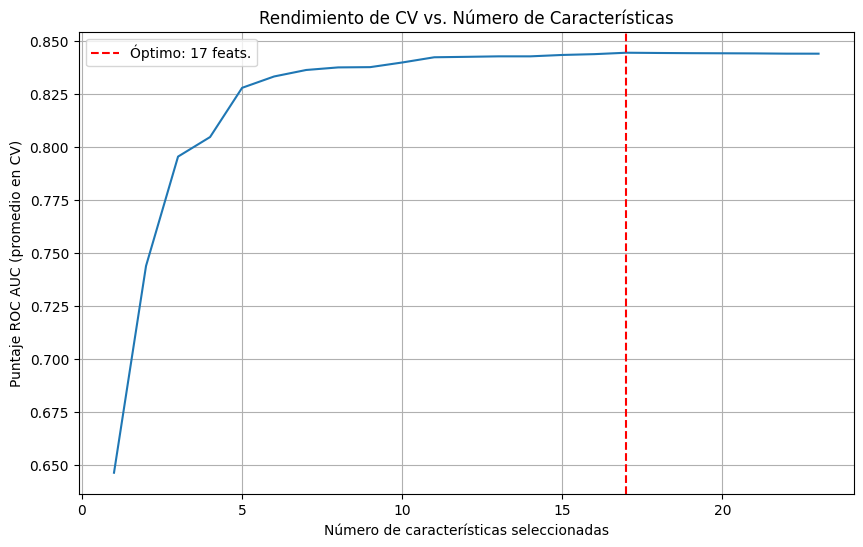

In [370]:
plt.figure(figsize=(10, 6))
plt.title('Rendimiento de CV vs. Número de Características')
plt.xlabel("Número de características seleccionadas")
plt.ylabel("Puntaje ROC AUC (promedio en CV)")
# `rfecv.cv_results_` contiene los puntajes. Necesitamos el número de características y el puntaje medio.
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.plot(range(1, n_scores + 1), rfecv.cv_results_["mean_test_score"])
plt.axvline(rfecv.n_features_, color='r', linestyle='--', label=f'Óptimo: {rfecv.n_features_} feats.')
plt.legend()
plt.grid()
plt.show()

In [371]:
rfecv.cv_results_["mean_test_score"][16]

np.float64(0.8445209991870855)

In [372]:
X_encoded_2 = X_encoded.drop('factura_total', axis=1)
X_encoded_2.head()

,antiguedad_meses,factura_mensual,genero_Male,adulto_mayor_1,tiene_pareja_Yes,tiene_dependientes_Yes,servicio_telefonico_Yes,multiples_lineas_Yes,servicio_internet_Fiber optic,servicio_internet_No,...,proteccion_dispositivo_Yes,soporte_tecnico_Yes,streaming_tv_Yes,streaming_peliculas_Yes,tipo_contrato_One year,tipo_contrato_Two year,facturacion_electronica_Yes,metodo_pago_Credit card (automatic),metodo_pago_Electronic check,metodo_pago_Mailed check
0,-0.951682,0.027862,False,False,True,True,True,False,False,False,...,False,True,True,False,True,False,True,False,False,True
1,-0.951682,-0.161583,True,False,False,False,True,True,False,False,...,False,False,False,True,False,False,False,False,False,True
2,-1.155283,0.303720,True,False,False,False,True,False,True,False,...,True,False,False,False,False,False,True,False,True,False
3,-0.788800,1.104706,True,True,True,False,True,False,True,False,...,True,False,True,True,False,False,True,False,True,False
4,-1.196004,0.636080,False,True,True,False,True,False,True,False,...,False,True,True,False,False,False,True,False,False,True


In [373]:
rfecv.fit(X_encoded_2, y_encoded)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=LogisticRegression(random_state=42, solver='liblinear'),
      n_jobs=-1, scoring='roc_auc')

In [374]:
print(f"Número óptimo de características: {rfecv.n_features_}")

Número óptimo de características: 17


In [375]:
selected_features_2 = X_encoded_2.columns[rfecv.support_]
print("\nCaracterísticas seleccionadas:")
print(selected_features_2.tolist())


Características seleccionadas:
['antiguedad_meses', 'factura_mensual', 'adulto_mayor_1', 'tiene_dependientes_Yes', 'servicio_telefonico_Yes', 'multiples_lineas_Yes', 'servicio_internet_Fiber optic', 'servicio_internet_No', 'seguridad_online_Yes', 'respaldo_online_Yes', 'soporte_tecnico_Yes', 'streaming_tv_Yes', 'streaming_peliculas_Yes', 'tipo_contrato_One year', 'tipo_contrato_Two year', 'facturacion_electronica_Yes', 'metodo_pago_Electronic check']


In [376]:
print("----Columnas descartadas-----")
for colum in X_encoded_2.columns.tolist():
    if colum not in selected_features_2:
        print(colum)


----Columnas descartadas-----
genero_Male
tiene_pareja_Yes
proteccion_dispositivo_Yes
metodo_pago_Credit card (automatic)
metodo_pago_Mailed check


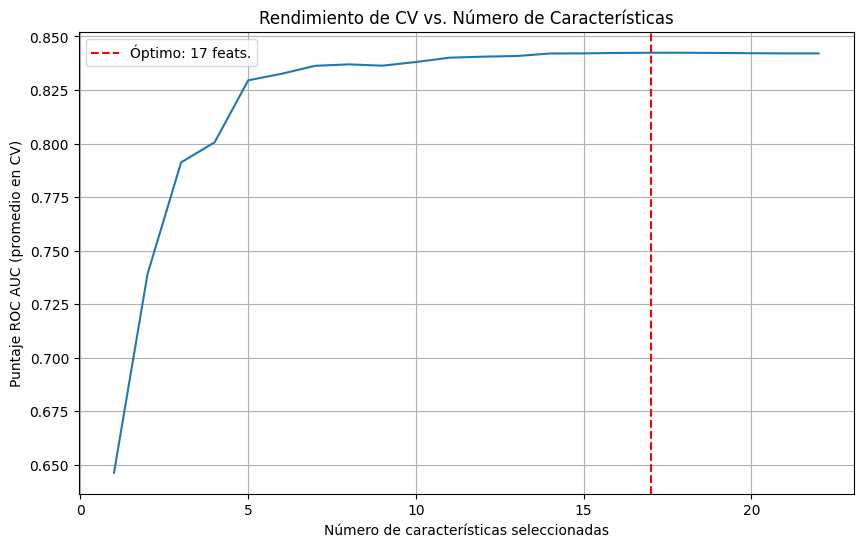

In [377]:
plt.figure(figsize=(10, 6))
plt.title('Rendimiento de CV vs. Número de Características')
plt.xlabel("Número de características seleccionadas")
plt.ylabel("Puntaje ROC AUC (promedio en CV)")
# `rfecv.cv_results_` contiene los puntajes. Necesitamos el número de características y el puntaje medio.
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.plot(range(1, n_scores + 1), rfecv.cv_results_["mean_test_score"])
plt.axvline(rfecv.n_features_, color='r', linestyle='--', label=f'Óptimo: {rfecv.n_features_} feats.')
plt.legend()
plt.grid()
plt.show()

In [378]:
rfecv.cv_results_["mean_test_score"][16]

np.float64(0.8423888173411015)

## Prueba sm.Logit()

In [379]:
## Prueba sm.Logit()

In [380]:
import pandas as pd
import statsmodels.api as sm





In [381]:
X_encoded_2 = X_encoded_2.astype(float)

In [382]:
modelo_logit = sm.Logit(y_encoded, X_encoded_2).fit()

Optimization terminated successfully.
         Current function value: 0.415670
         Iterations 8


In [383]:
print("----Columnas descartadas-----")
for colum in X_encoded_2.columns.tolist():
    if colum not in selected_features_2:
        print(colum)


----Columnas descartadas-----
genero_Male
tiene_pareja_Yes
proteccion_dispositivo_Yes
metodo_pago_Credit card (automatic)
metodo_pago_Mailed check


In [384]:
print(modelo_logit.summary())

                           Logit Regression Results                           
Dep. Variable:              churn_Yes   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7021
Method:                           MLE   Df Model:                           21
Date:                Mon, 11 Aug 2025   Pseudo R-squ.:                  0.2816
Time:                        19:40:10   Log-Likelihood:                -2927.6
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
antiguedad_meses                       -0.8340      0.058    -14.376      0.000      -0.948      -0.720
factura_mensual                         0.9607      0.12

In [385]:
X_encoded_2.head()

,antiguedad_meses,factura_mensual,genero_Male,adulto_mayor_1,tiene_pareja_Yes,tiene_dependientes_Yes,servicio_telefonico_Yes,multiples_lineas_Yes,servicio_internet_Fiber optic,servicio_internet_No,...,proteccion_dispositivo_Yes,soporte_tecnico_Yes,streaming_tv_Yes,streaming_peliculas_Yes,tipo_contrato_One year,tipo_contrato_Two year,facturacion_electronica_Yes,metodo_pago_Credit card (automatic),metodo_pago_Electronic check,metodo_pago_Mailed check
0,-0.951682,0.027862,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,-0.951682,-0.161583,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.155283,0.303720,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.788800,1.104706,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,-1.196004,0.636080,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


# Modelo de regresion logistica

In [387]:
selected_features_2 = X_encoded_2.columns[rfecv.support_]
print("\nCaracterísticas seleccionadas:")
print(selected_features_2)


Características seleccionadas:
Index(['antiguedad_meses', 'factura_mensual', 'adulto_mayor_1',
       'tiene_dependientes_Yes', 'servicio_telefonico_Yes',
       'multiples_lineas_Yes', 'servicio_internet_Fiber optic',
       'servicio_internet_No', 'seguridad_online_Yes', 'respaldo_online_Yes',
       'soporte_tecnico_Yes', 'streaming_tv_Yes', 'streaming_peliculas_Yes',
       'tipo_contrato_One year', 'tipo_contrato_Two year',
       'facturacion_electronica_Yes', 'metodo_pago_Electronic check'],
      dtype='object')


## Separar variables Explicativas (X), y variable de respuesta (y)

In [388]:
columnas_originales_optimizada = [
    'antiguedad_meses', 'factura_mensual', 'adulto_mayor', 'tiene_dependientes',
    'servicio_telefonico', 'multiples_lineas', 'servicio_internet',
    'seguridad_online', 'respaldo_online', 'soporte_tecnico', 'streaming_tv',
    'streaming_peliculas', 'tipo_contrato', 'facturacion_electronica', 'metodo_pago'
]

In [389]:
datos = datos.drop('factura_total', axis=1)

In [390]:
X = datos[columnas_originales_optimizada]
X.head()

,antiguedad_meses,factura_mensual,adulto_mayor,tiene_dependientes,servicio_telefonico,multiples_lineas,servicio_internet,seguridad_online,respaldo_online,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,facturacion_electronica,metodo_pago
0,9,65.6,0,Yes,Yes,No,DSL,No,Yes,Yes,Yes,No,One year,Yes,Mailed check
1,9,59.9,0,No,Yes,Yes,DSL,No,No,No,No,Yes,Month-to-month,No,Mailed check
2,4,73.9,0,No,Yes,No,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check
3,13,98.0,1,No,Yes,No,Fiber optic,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
4,3,83.9,1,No,Yes,No,Fiber optic,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check


In [391]:
y = datos['churn']
y = y.map({'Yes': 1, 'No': 0})
y.head()

,churn
0,0
1,0
2,1
3,1
4,1


## Separando en variables de entrenamiento y de prueba

In [392]:
from sklearn.model_selection import train_test_split

In [393]:
datos["churn"].value_counts(normalize=True)*100

,proportion
churn,
No,73.463013
Yes,26.536987


In [394]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 20% de los datos para el conjunto de prueba
    random_state=42,     # Para que la división sea reproducible
    stratify=y           # Para mantener la proporción de la variable objetivo
)

In [395]:
y_train.value_counts(normalize=True)*100

,proportion
churn,
0,73.464679
1,26.535321


In [396]:
y_test.value_counts(normalize=True)*100

,proportion
churn,
0,73.456352
1,26.543648


In [397]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import numpy as np

In [398]:
columnas_num = X_train.select_dtypes(include=['number']).columns
columnas_cat = X_train.select_dtypes(include=['object']).columns


In [399]:
preprocesador = ColumnTransformer(
    transformers=[
        ('proceso_numerico', StandardScaler(), columnas_num),
        ('proceso_categorico', OneHotEncoder(handle_unknown='ignore'), columnas_cat)
    ],
    remainder='passthrough' # Dejar las columnas no especificadas tal como están (si las hubiera)
)

In [400]:
pipeline_final = ImbPipeline([
    ('preprocesador', preprocesador),
    ('balanceador', SMOTE(random_state=42)),
    ('clasificador', LogisticRegression(solver='liblinear', random_state=42))
])

In [401]:
parametros_grid = {
    'clasificador__penalty': ['l1', 'l2'],
    'clasificador__C': [0.01, 0.1, 1, 10, 100]
}

In [402]:
from sklearn.model_selection import GridSearchCV

In [403]:
grid_search = GridSearchCV(
    estimator=pipeline_final,      # Nuestro pipeline completo a optimizar
    param_grid=parametros_grid,  # El diccionario de ajustes que definimos
    scoring='roc_auc',           # La métrica que queremos maximizar
    cv=10,                       # El número de pliegues para la validación cruzada
    n_jobs=-1,                   # Usar todos los procesadores de tu CPU para acelerar
    verbose=1                    # Mostrar información del progreso mientras se ejecuta
)

In [404]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocesador',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('proceso_numerico',
                                                                         StandardScaler(),
                                                                         Index(['antiguedad_meses', 'factura_mensual'], dtype='object')),
                                                                        ('proceso_categorico',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['adulto_mayor', 'tiene_dependientes', 'servicio_telefonico',
       'multip...
       'respaldo_online', 'soporte_tecnico', 'streaming_tv',
       'streaming_peliculas', 'tipo_contrato', 'facturacion_electronica',
       'metodo_pago'],
      dtype='object'))])),
                                       ('balanceador', SMOTE(random_state=42)),
                                       ('clasificador',
                                        LogisticRegression(random_state=42,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'clasificador__C': [0.01, 0.1, 1, 10, 100],
                         'clasificador__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [405]:
print(f"Mejores Parámetros encontrados: {grid_search.best_params_}")

print(f"Mejor Puntuación (ROC AUC) en Validación Cruzada: {grid_search.best_score_:.4f}")

Mejores Parámetros encontrados: {'clasificador__C': 0.1, 'clasificador__penalty': 'l2'}
Mejor Puntuación (ROC AUC) en Validación Cruzada: 0.8429


In [406]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [407]:
y_pred = grid_search.predict(X_test)

In [408]:
y_pred_proba = grid_search.predict_proba(X_test)[:, 1]

In [409]:
print(f"\nPrecisión Final: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(f"ROC AUC Final: {roc_auc_score(y_test, y_pred_proba):.4f}")


Precisión Final: 75.02%
ROC AUC Final: 0.8413


In [411]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1035
           1       0.52      0.78      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409



In [414]:
y_pred_train = grid_search.predict(X_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      4139
           1       0.53      0.79      0.63      1495

    accuracy                           0.76      5634
   macro avg       0.72      0.77      0.72      5634
weighted avg       0.81      0.76      0.77      5634



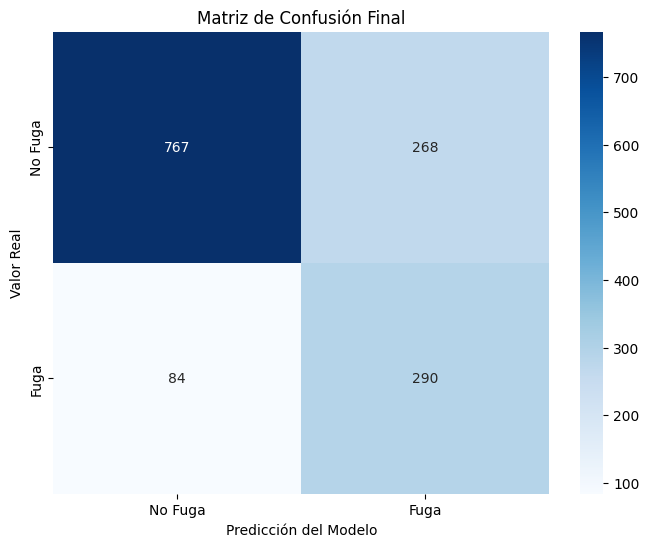

In [410]:
matriz_confusion_reg_log = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion_reg_log, annot=True, fmt='g', cmap='Blues',
            xticklabels=['No Fuga', 'Fuga'], yticklabels=['No Fuga', 'Fuga'])
plt.xlabel('Predicción del Modelo')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión Final')
plt.show()

# Modelo con RandomForest

In [468]:
X_rf = datos.drop('churn', axis=1)
y_rf = datos['churn']

In [469]:
columnas_numericas = X_rf.select_dtypes(include=['number']).columns
columnas_categoricas = X_rf.select_dtypes(include=['object']).columns

In [470]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [471]:
preprocesador = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columnas_numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), columnas_categoricas)
    ])

In [472]:
estimador_rf = RandomForestClassifier(random_state=42)

In [473]:
cv = StratifiedKFold(5)

In [474]:
rfecv = RFECV(
    estimator=estimador_rf,
    step=1,
    cv=cv,
    scoring='roc_auc',
    min_features_to_select=5,
    n_jobs=-1
)

In [475]:
pipeline_seleccion = Pipeline([
    ('preprocesador', preprocesador),
    ('selector', rfecv)
])

In [476]:
pipeline_seleccion.fit(X_rf, y_rf)

Pipeline(steps=[('preprocesador',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['antiguedad_meses', 'factura_mensual'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['genero', 'adulto_mayor', 'tiene_pareja', 'tiene_dependientes',
       'servicio_telefonico', 'multiples_lineas', 'servicio_internet',
       'seguridad_o...line', 'proteccion_dispositivo',
       'soporte_tecnico', 'streaming_tv', 'streaming_peliculas',
       'tipo_contrato', 'facturacion_electronica', 'metodo_pago'],
      dtype='object'))])),
                ('selector',
                 RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                       estimator=RandomForestClassifier(random_state=42),
                       min_features_to_select=5, n_jobs=-1,
                       scoring='roc_auc'))])

In [464]:
datos.head(1)

,churn,genero,adulto_mayor,tiene_pareja,tiene_dependientes,antiguedad_meses,servicio_telefonico,multiples_lineas,servicio_internet,seguridad_online,respaldo_online,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,facturacion_electronica,metodo_pago,factura_mensual
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6


In [477]:
rfecv_results = pipeline_seleccion.named_steps['selector']
nombres_features_codificados = pipeline_seleccion.named_steps['preprocesador'].get_feature_names_out()
columnas_seleccionadas_rf_codificadas = nombres_features_codificados[rfecv_results.support_]

print(f"\nNúmero óptimo de características encontrado: {rfecv_results.n_features_}")
print("\nColumnas seleccionadas (versión codificada):")
print(columnas_seleccionadas_rf_codificadas)


Número óptimo de características encontrado: 21

Columnas seleccionadas (versión codificada):
['num__antiguedad_meses' 'num__factura_mensual' 'cat__genero_Male'
 'cat__adulto_mayor_1' 'cat__tiene_pareja_Yes'
 'cat__tiene_dependientes_Yes' 'cat__multiples_lineas_Yes'
 'cat__servicio_internet_Fiber optic' 'cat__servicio_internet_No'
 'cat__seguridad_online_Yes' 'cat__respaldo_online_Yes'
 'cat__proteccion_dispositivo_Yes' 'cat__soporte_tecnico_Yes'
 'cat__streaming_tv_Yes' 'cat__streaming_peliculas_Yes'
 'cat__tipo_contrato_One year' 'cat__tipo_contrato_Two year'
 'cat__facturacion_electronica_Yes'
 'cat__metodo_pago_Credit card (automatic)'
 'cat__metodo_pago_Electronic check' 'cat__metodo_pago_Mailed check']


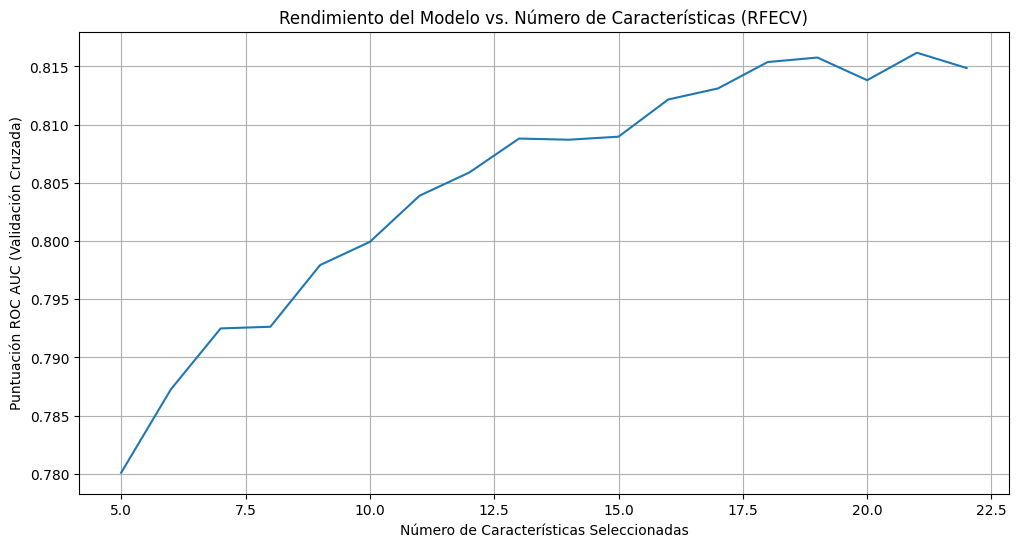

In [478]:
plt.figure(figsize=(12, 6))
plt.xlabel("Número de Características Seleccionadas")
plt.ylabel("Puntuación ROC AUC (Validación Cruzada)")
plt.plot(range(rfecv_results.min_features_to_select, len(rfecv_results.cv_results_['mean_test_score']) + rfecv_results.min_features_to_select), rfecv_results.cv_results_['mean_test_score'])
plt.title("Rendimiento del Modelo vs. Número de Características (RFECV)")
plt.grid()
plt.show()

In [467]:
from sklearn.model_selection import train_test_split

In [444]:
datos.columns

Index(['churn', 'genero', 'adulto_mayor', 'tiene_pareja', 'tiene_dependientes',
       'antiguedad_meses', 'servicio_telefonico', 'multiples_lineas',
       'servicio_internet', 'seguridad_online', 'respaldo_online',
       'proteccion_dispositivo', 'soporte_tecnico', 'streaming_tv',
       'streaming_peliculas', 'tipo_contrato', 'facturacion_electronica',
       'metodo_pago', 'factura_mensual'],
      dtype='object')

In [484]:
columnas_optimizadas_rf = ['antiguedad_meses' , 'factura_mensual', 'genero', 'adulto_mayor' , 'tiene_pareja', 'tiene_dependientes', 'multiples_lineas', 'servicio_internet', 'seguridad_online', 'respaldo_online', 'proteccion_dispositivo', 'soporte_tecnico', 'streaming_tv', 'streaming_peliculas', 'tipo_contrato', 'facturacion_electronica', 'metodo_pago' ]

In [485]:
X_final = datos[columnas_optimizadas_rf]
y_final = datos['churn']

In [486]:
X_final.head()

,antiguedad_meses,factura_mensual,genero,adulto_mayor,tiene_pareja,tiene_dependientes,multiples_lineas,servicio_internet,seguridad_online,respaldo_online,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,facturacion_electronica,metodo_pago
0,9,65.6,Female,0,Yes,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check
1,9,59.9,Male,0,No,No,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check
2,4,73.9,Male,0,No,No,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check
3,13,98.0,Male,1,Yes,No,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
4,3,83.9,Female,1,Yes,No,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check


In [499]:
X_trainrf, X_testrf, y_trainrf, y_testrf = train_test_split(X_final, y_final, test_size=0.2, random_state=42, stratify=y_final)

In [500]:
columnas_numericas_final = X_trainrf.select_dtypes(include=["number"]).columns
columnas_categoricas_final = X_trainrf.select_dtypes(include=['object']).columns

In [489]:
preprocesador_final = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columnas_numericas_final),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), columnas_categoricas_final) # Usamos drop='first' como buena práctica
    ])

In [501]:
pipeline_rf_final = ImbPipeline([
    ('preprocesador', preprocesador_final),
    ('balanceador', SMOTE(random_state=42)),
    ('clasificador', RandomForestClassifier(random_state=42))
])

In [502]:
parametros_grid_rf = {
    'clasificador__n_estimators': [100, 200, 300],
    'clasificador__max_depth': [5, 10, 15],
    'clasificador__min_samples_leaf': [2, 4],
    'clasificador__max_features': ['sqrt']
}

In [503]:
grid_search_rf = GridSearchCV(
    estimator=pipeline_rf_final,
    param_grid=parametros_grid_rf,
    cv=5,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1
)

In [504]:
grid_search_rf.fit(X_trainrf, y_trainrf)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocesador',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['antiguedad_meses', 'factura_mensual'], dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         Index(['genero', 'adulto_mayor', 'tiene_pareja', 'tiene_dependientes',
       'multiples_lineas', 'servicio_internet', 'segur...
       'facturacion_electronica', 'metodo_pago'],
      dtype='object'))])),
                                       ('balanceador', SMOTE(random_state=42)),
                                       ('clasificador',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'clasificador__max_depth': [5, 10, 15],
                         'clasificador__max_features': ['sqrt'],
                         'clasificador__min_samples_leaf': [2, 4],
                         'clasificador__n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=1)

In [505]:
print(f"Mejores Parámetros: {grid_search_rf.best_params_}")
print(f"Mejor Puntuación (ROC AUC) en CV: {grid_search_rf.best_score_:.4f}")

Mejores Parámetros: {'clasificador__max_depth': 5, 'clasificador__max_features': 'sqrt', 'clasificador__min_samples_leaf': 2, 'clasificador__n_estimators': 200}
Mejor Puntuación (ROC AUC) en CV: 0.8422


In [506]:
from sklearn.metrics import classification_report, roc_auc_score

In [507]:
y_pred_rf = grid_search_rf.predict(X_testrf)
y_pred_proba_rf = grid_search_rf.predict_proba(X_testrf)[:, 1]

In [508]:
print(f"ROC AUC Final en Prueba: {roc_auc_score(y_testrf, y_pred_proba_rf):.4f}")

ROC AUC Final en Prueba: 0.8418


In [512]:
y_pred_rf_train = grid_search_rf.predict(X_trainrf)
print(classification_report(y_trainrf, y_pred_rf_train))

              precision    recall  f1-score   support

          No       0.91      0.75      0.82      4139
         Yes       0.54      0.79      0.64      1495

    accuracy                           0.76      5634
   macro avg       0.72      0.77      0.73      5634
weighted avg       0.81      0.76      0.78      5634



In [509]:
print(classification_report(y_testrf, y_pred_rf))

              precision    recall  f1-score   support

          No       0.91      0.75      0.82      1035
         Yes       0.54      0.79      0.64       374

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409



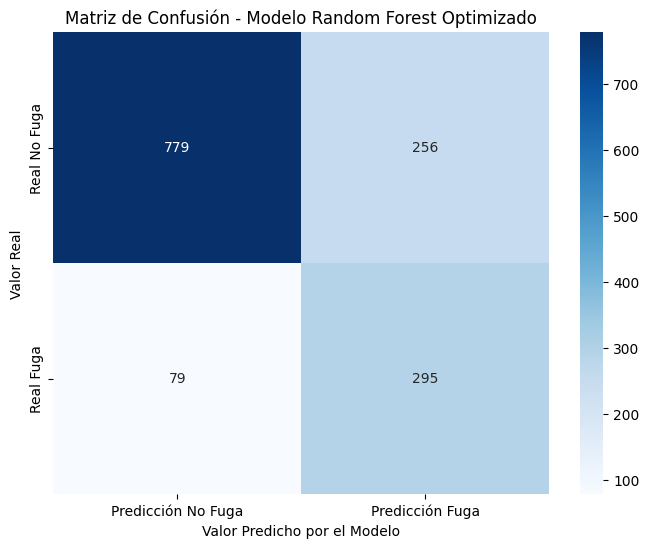


Matriz de Confusión (Valores Numéricos):
[[779 256]
 [ 79 295]]


In [510]:
matriz_confusion_rf = confusion_matrix(y_testrf, y_pred_rf)

# 2. Visualizar la matriz de confusión para una interpretación más clara
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicción No Fuga', 'Predicción Fuga'],
            yticklabels=['Real No Fuga', 'Real Fuga'])
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho por el Modelo')
plt.title('Matriz de Confusión - Modelo Random Forest Optimizado')
plt.show()

# 3. Imprimir la matriz para referencia
print("\nMatriz de Confusión (Valores Numéricos):")
print(matriz_confusion_rf)

## Analisis de los resultados

### Evaluacion los modelos:

- Exactitud: Segun los datos obtenidos en exactitud con 75,02% para la regresion logistica y 76,22% para RandomForest. Es decir del total de predicciones RandomForest es ligeramente mejor.

- Precisión: Segun los calculos realizados, Regesion logistica obtiene un 52% para este indicador y RamdForest un 54%. Es decir, RandomForest predice ligeramente mejor cuando se predice una Fuga.

- Recall: Regresion logistica obtuvo un 78% y RandomForest UN 79%. Esto quiere decir que RandomForest predice marginalmente mejor un cliente que realmente se fugo.

- F1-Score:  Regresion logistica 0.62 y RandomForest 0.64, indicando que el 2do modelo tiene un mejor balance general en las predicciones.

En general el modelo de prediccion con Random Forest comete 5 menos errores del tipo Falsos negativos (Predecidos como No fuga, pero realmente se Fugan).

Tambien genera 12 predicciones menos del tipo Falsos Positivos (Predichos como Fuga, pero no se fugan).

Por lo tanto el modelo Random Forest es mejor, aunque con pocas diferencias. Es mas preciso en sus alarmas y comete menos errores permitiendo un ahorro de costos al ser implementados en un escenario empresarial.

- Overffiting o underffinting

Comparamos las metricas de los dos de prueba con los datos de Entrenamiento obteniendo los siguientes resultados:

<u>1. Diagnóstico del Modelo de Regresión Logística</u>

Diferencia entre metricas
<ul>Recall:

- Rendimiento Entrenamiento = 0.79
- Rendimiento Prueba:	0.78	</ul>
</br>

<ul>F1-Score:

- Rendimiento Entrenamiento =	0.63
- Rendiemitno Prueba = 0.62	</ul>


La diferencia en el rendimiento entre los datos de entrenamiento y los datos de prueba es mínima mostrando caída de solo un 1% en recall y f1-score. Esto es una señal que el modelo se comporta de manera muy consistente y predecible.
Esto es un indicador de que no presenta signos de overfitting ni underffiting.

</br>

<u>2. Diagnóstico del Modelo Random Forest</u>

Diferencia entre metricas
<ul>Recall:

  - Entrenamiento = 0.79
  - Prueba = 0.79	</ul>
</br>

<ul>F1-Score:

  - Entrenamiento =	0.64
  - Prueba = 0.64	</ul>

El rendimiento del Random Forest en el conjunto de prueba es prácticamente idéntico a su rendimiento en el conjunto de entrenamiento. Esto indica una capacidad de generalización bastante buena eliminando la probabilidad de existencia de overfitting o underffiting.

---



**Introducción**

Este informe detalla los resultados de un proyecto de machine learning cuyo objetivo fue identificar los factores que impulsan la cancelación de clientes (churn) y desarrollar una herramienta predictiva para detectar a los clientes en mayor riesgo. Tras evaluar y optimizar rigurosamente múltiples modelos, se seleccionó un modelo Random Forest como la solución de mayor rendimiento.

El modelo final es capaz de identificar correctamente al 79% de los clientes que están a punto de cancelar su servicio, proporcionando una herramienta de alto impacto para que el equipo de retención pueda actuar de manera proactiva.

El análisis revela que los factores más determinantes de la cancelación no son demográficos, sino contractuales, financieros y de servicio. Los principales impulsores de la fuga son:

1. Tener un contrato mes a mes.

2. Ser un cliente de corta antigüedad.

3. No tener servicios de soporte y seguridad adicionales.

4. Pagar mediante cheque electrónico.

Basado en estos hallazgos, se proponen cuatro estrategias de retención enfocadas en fortalecer la relación contractual, mejorar la experiencia del cliente nuevo, aumentar la adopción de servicios de "anclaje" y optimizar los métodos de pago.

---

**1. Análisis de las Variables Más Relevantes**

Para entender el "porqué" detrás de la cancelación, analizamos qué características consideraron más importantes nuestros dos mejores modelos. Ambos llegaron a conclusiones muy similares, lo que nos da una gran confianza en los resultados.

- Regresión Logística (Análisis de Coeficientes): Este modelo nos permitió ver la dirección y la fuerza del impacto de cada variable. Por ejemplo, nos mostró que tener un contrato de dos años (tipo_contrato_Two year) reduce drásticamente la probabilidad de cancelación, mientras que tener una factura mensual alta (factura_mensual) la aumenta.

- Random Forest (Importancia de Variables): Este modelo, al ser más complejo, nos proporcionó un ranking de la importancia predictiva general de cada variable. Confirmó que las variables contractuales y la antigüedad son, por lejos, los predictores más potentes.

Combinando ambos análisis, identificamos los siguientes factores como los principales impulsores de la decisión de un cliente de cancelar el servicio.

---

**2. Principales Factores que Afectan la Cancelación**


**Factor 1**: La Naturaleza del Contrato
- Observación: Los clientes con contratos mes a mes son masivamente más propensos a cancelar que aquellos con contratos de uno o dos años. La estabilidad de un contrato a largo plazo es el factor de retención más importante.

- Implicación: El contrato mes a mes ofrece flexibilidad, pero también facilita la salida del cliente ante la menor insatisfacción o una oferta de la competencia.

**Factor 2**: La Antigüedad del Cliente
- Observación: El riesgo de cancelación es mucho mayor durante los primeros meses de servicio. Los clientes que superan el primer año se vuelven significativamente más leales.

- Implicación: La experiencia inicial del cliente es un periodo crítico que define la relación a largo plazo.

**Factor 3**: Servicios de "Anclaje"
- Observación: Clientes que contratan servicios adicionales como Soporte Técnico y Seguridad Online tienen una tasa de cancelación mucho menor.

- Implicación: Estos servicios no solo generan ingresos, sino que integran más profundamente al cliente en el ecosistema de la empresa, aumentando su dependencia y el coste de cambiarse a un competidor.

**Factor 4**: Método de Pago y Facturación
- Observación: Los clientes que utilizan el Cheque Electrónico  como método de pago y tienen Facturación Electrónica muestran una mayor tendencia a cancelar.

- Implicación: Esto puede indicar un perfil de cliente más transaccional y menos "comprometido" que aquellos con pagos automáticos con tarjeta de crédito. También podría señalar fricciones o problemas en el proceso de pago electrónico que generan insatisfacción.

---

**3. Propuestas de Estrategias de Retención**

Basado en el análisis cuantitativo anterior, se propoonen las siguientes estrategias proactivas, dirigidas y medibles.

1. Contrato mes a mes: Campaña de mejora de contraro, y asi ofrecer de manera proactiva a los clientes de "mes a mes" con más de 3 meses de antigüedad la opción de migrar a un contrato de 1 año o 2 años, a cambio de un descuento en su factura mensual o un mes de servicio gratuito.

2. Clientes nuevos: Programa de Bienvenida y asi implementar un programa de incorporacion intensivo durante los primeros 90 días, con llamadas de seguimiento y tutoriales. Ofrecer un pequeño bono o descuento automático al cumplir los 6 meses de servicio (clientes contrato mes a mes).

4. Carencia de servicios: Utilizar el modelo para identificar clientes de alto riesgo que no tengan Soporte Técnico o Seguridad Online y ofrecerles un paquete con estos servicios a un precio muy atractivo durante los primeros 6 meses.

5. Pago con Cheque electrónico: Ofrecer un descuento único a los clientes que cambien su método de pago de "Cheque Electrónico" a un pago automático con tarjeta de crédito o débito bancario.

---

**4. Conclusión**

El análisis de machine learning ha demostrado que la cancelación de clientes no es un evento aleatorio, sino un proceso predecible impulsado por factores claros y accionables. Hemos desarrollado una herramienta predictiva, un modelo Random Forest, capaz de identificar al 79% de los clientes en riesgo de fuga.

Se recomienda la implementación de las estrategias de retención propuestas, utilizando las predicciones del modelo para enfocar los esfuerzos del equipo de marketing de manera eficiente y proactiva. El seguimiento continuo de estas iniciativas y del rendimiento del modelo permitirá refinar nuestras tácticas y proteger nuestra base de clientes de manera sostenible.